In [2]:
import pandas as pd

In [3]:
df = pd.read_excel("/content/House_Rent_Train.xlsx")

In [4]:
df['type']=df['type'].fillna(df['type'].mode().iloc[0])
df['locality']=df['locality'].fillna(df['locality'].mode().iloc[0])
df['lease_type']=df['lease_type'].fillna(df['lease_type'].mode().iloc[0])
df['bathroom']=df['bathroom'].fillna(df['bathroom'].median())
df['facing']=df['facing'].fillna(df['facing'].mode().iloc[0])
df['cup_board']=df['cup_board'].fillna(df['cup_board'].mode().iloc[0])
df['floor']=df['floor'].fillna(df['floor'].median())
df['amenities']=df['amenities'].fillna(df['amenities'].mode().iloc[0])
df['water_supply']=df['water_supply'].fillna(df['water_supply'].mode().iloc[0])
df['building_type']=df['building_type'].fillna(df['building_type'].mode().iloc[0])
df['balconies']=df['balconies'].fillna(df['balconies'].median())
df['rent']=df['rent'].fillna(df['rent'].median())
df['total_floor']=df['total_floor'].fillna(df['total_floor'].median())
df['property_age']=df['property_age'].fillna(df['property_age'].median())

In [5]:
df=df.dropna()

In [6]:
# Checking for duplicates in the dataset
duplicates = df.duplicated().sum()
print('Number of duplicate rows:', duplicates)

# Dropping duplicates
if duplicates > 0:
    df = df.drop_duplicates()
    print('Duplicates have been dropped.')
else:
    print('No duplicates to drop.')

Number of duplicate rows: 32
Duplicates have been dropped.


In [7]:
def convert_date(value):
    try:
        return pd.to_datetime(value, format='%d-%m-%Y %H:%M')
    except ValueError:
        return pd.to_datetime(value, format='%Y-%m-%d %H:%M:%S')

# Apply the conversion function to 'activation_date' column
df['activation_date'] = df['activation_date'].apply(convert_date)

In [8]:
import json
# Update the function to check for True or False in the values of the keys in the dictionary
# and add it to the column as true or false without encoding

def update_amenities_columns(df, column):
    # Parse the JSON-like strings into dictionaries
    amenities_dicts = df[column].apply(lambda x: json.loads(x) if pd.notnull(x) else {})

    # Iterate over each dictionary and update the dataframe
    for index, amenities in amenities_dicts.iteritems():
        for key, value in amenities.items():
            # Use the key name with a prefix to avoid conflicts with existing columns
            column_name = 'amenity_' + key
            # Assign the boolean value directly
            df.at[index, column_name] = value

    return df

# Apply the function to update the amenities columns
df = update_amenities_columns(df, 'amenities')
print('Updated dataframe with true/false amenities:')

<ipython-input-8-11bbe34eac34>:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, amenities in amenities_dicts.iteritems():


Updated dataframe with true/false amenities:


In [9]:
df = df.drop(['amenity_LIFT','amenity_GYM','amenity_POOL','amenities'],axis=1)

In [10]:
df=df.dropna()

In [11]:
df['amenity_CLUB']=df['amenity_CLUB'].fillna(df['amenity_CLUB'].mode().iloc[0])
df['amenity_CPA']=df['amenity_CPA'].fillna(df['amenity_CPA'].mode().iloc[0])
df['amenity_SERVANT']=df['amenity_SERVANT'].fillna(df['amenity_SERVANT'].mode().iloc[0])
df['amenity_GP']=df['amenity_GP'].fillna(df['amenity_GP'].mode().iloc[0])
df['amenity_RWH']=df['amenity_RWH'].fillna(df['amenity_RWH'].mode().iloc[0])
df['amenity_STP']=df['amenity_STP'].fillna(df['amenity_STP'].mode().iloc[0])
df['amenity_VP']=df['amenity_VP'].fillna(df['amenity_VP'].mode().iloc[0])

In [12]:
import pandas as pd

# Separate the time from the 'activation_date' column and create a new column for it
# First, convert the 'activation_date' to datetime

df['activation_date'] = pd.to_datetime(df['activation_date'], errors='coerce')
# Now, extract the time and create a new column 'activation_time'
df['activation_time'] = df['activation_date'].dt.time

# Display the head of the dataframe to confirm the new column
print(df[['activation_date', 'activation_time']].head())

      activation_date activation_time
0 2018-04-21 14:44:00        14:44:00
1 2017-09-10 12:48:00        12:48:00
2 2018-12-06 22:02:00        22:02:00
3 2018-07-20 16:22:00        16:22:00
4 2018-05-31 17:41:00        17:41:00


In [13]:
df['activation_date'] = df['activation_date'].dt.normalize()

# Display the head of the dataframe to confirm the change
print(df[['activation_date']].head())

  activation_date
0      2018-04-21
1      2017-09-10
2      2018-12-06
3      2018-07-20
4      2018-05-31


In [14]:
null_values = df.isnull().sum()
print(null_values)

id                  0
type                0
locality            0
activation_date     0
latitude            0
longitude           0
lease_type          0
gym                 0
lift                0
swimming_pool       0
negotiable          0
furnishing          0
parking             0
property_size       0
property_age        0
bathroom            0
facing              0
cup_board           0
floor               0
total_floor         0
water_supply        0
building_type       0
balconies           0
rent                0
amenity_INTERNET    0
amenity_AC          0
amenity_CLUB        0
amenity_INTERCOM    0
amenity_CPA         0
amenity_FS          0
amenity_SERVANT     0
amenity_SECURITY    0
amenity_SC          0
amenity_GP          0
amenity_PARK        0
amenity_RWH         0
amenity_STP         0
amenity_HK          0
amenity_PB          0
amenity_VP          0
activation_time     0
dtype: int64


In [15]:
df = df.drop(['id','activation_date','activation_time'], axis=1)

In [16]:
# Find negative values in the 'property_age' column
negative_values = df['property_age'] < 0

# Display the rows where 'property_age' is negative
print(negative_values)

0        False
1        False
2        False
3        False
4        False
         ...  
20495    False
20496    False
20497    False
20498    False
20499    False
Name: property_age, Length: 19433, dtype: bool


In [17]:
sum_of_negatives = df[df['property_age'] < 0]

In [18]:
df.loc[df['property_age'] < 0, 'property_age'] = 1

In [19]:
sum_of_negatives = df[df['property_age'] < 0]
sum_of_negatives

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,amenity_SERVANT,amenity_SECURITY,amenity_SC,amenity_GP,amenity_PARK,amenity_RWH,amenity_STP,amenity_HK,amenity_PB,amenity_VP


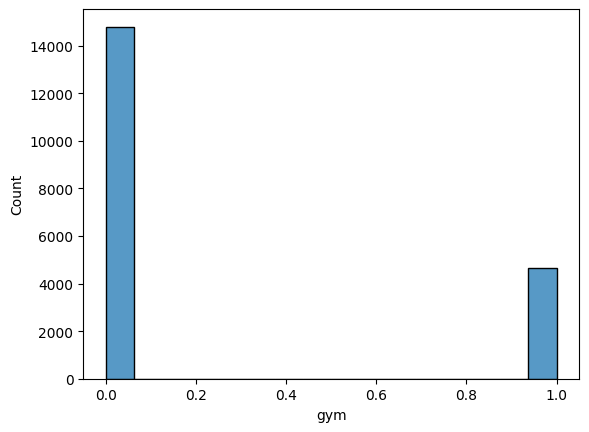

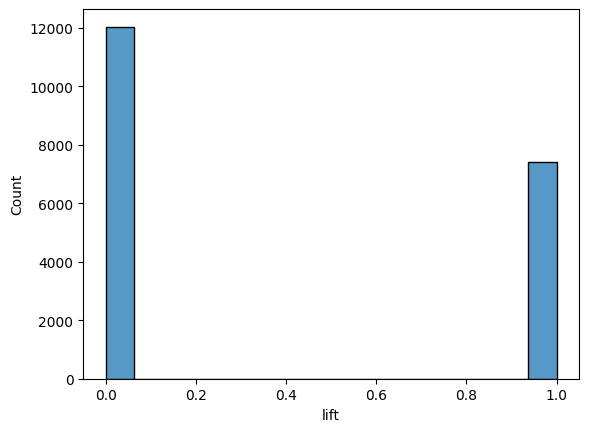

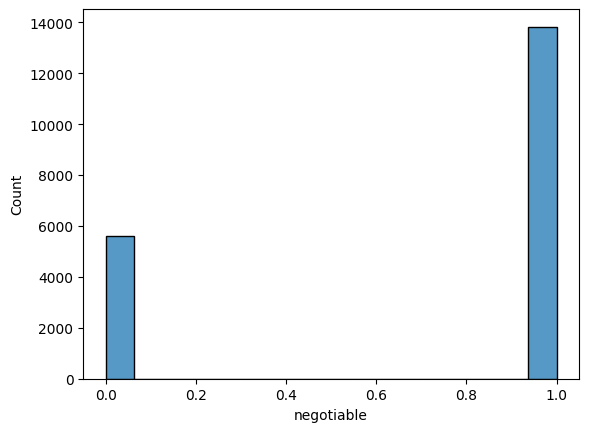

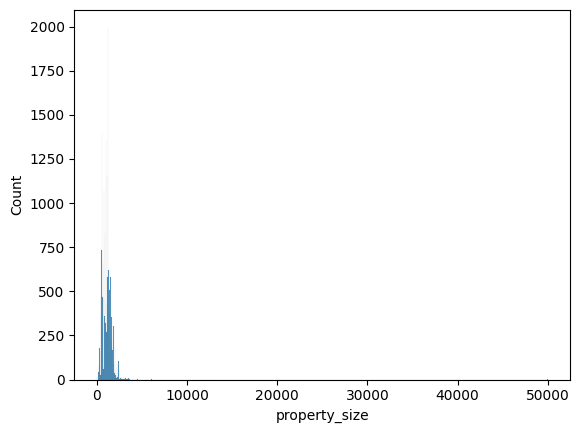

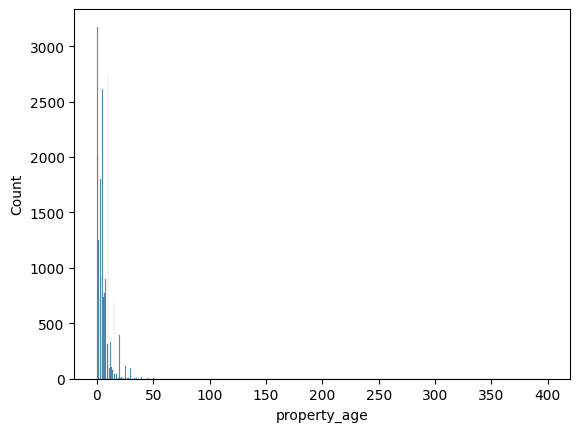

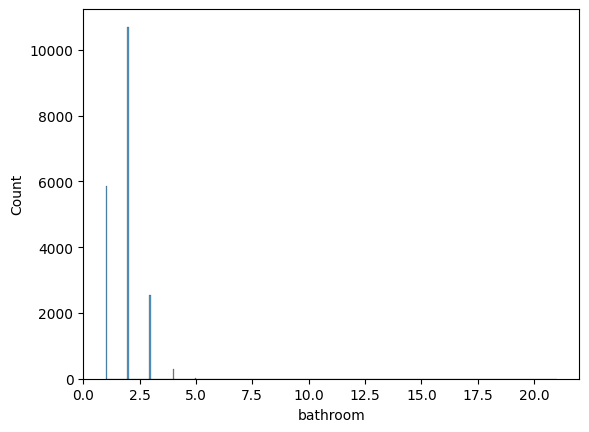

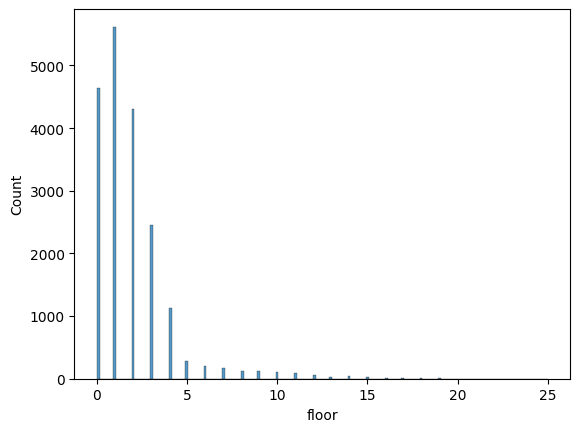

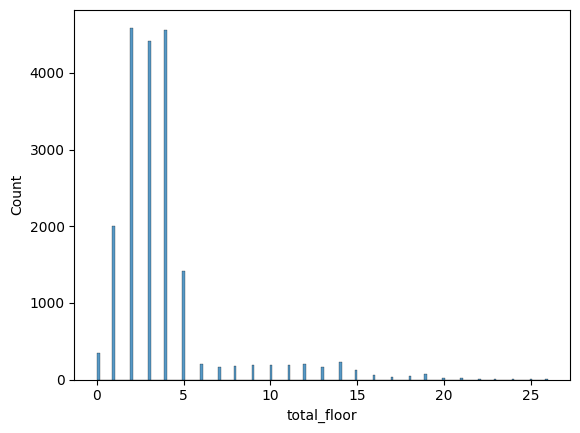

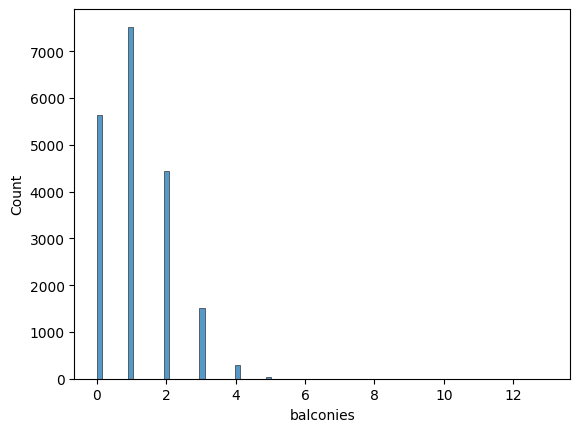

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# univariant
sns.histplot(df['gym'])
plt.show()
sns.histplot(df['lift'])
plt.show()
sns.histplot(df['negotiable'])
plt.show()
sns.histplot(df['property_size'])
plt.show()
sns.histplot(df['property_age'])
plt.show()
sns.histplot(df['bathroom'])
plt.show()
# sns.histplot(df['cup_board'])
# plt.show()
sns.histplot(df['floor'])
plt.show()
sns.histplot(df['total_floor'])
plt.show()
sns.histplot(df['balconies'])
plt.show()

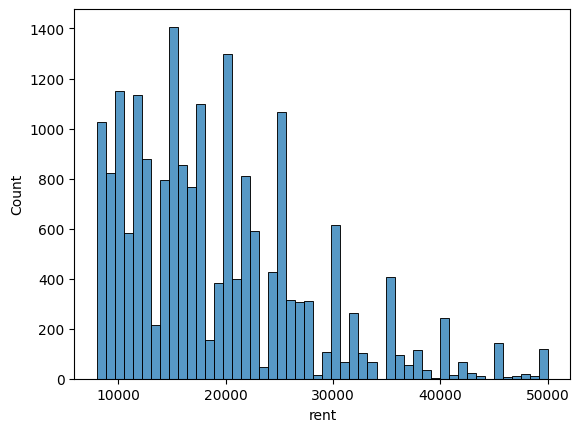

In [21]:
sns.histplot(df['rent'])
plt.show()

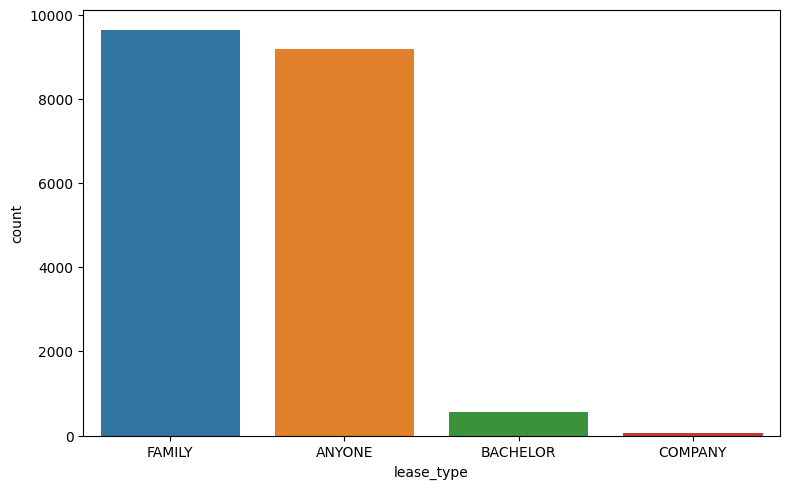

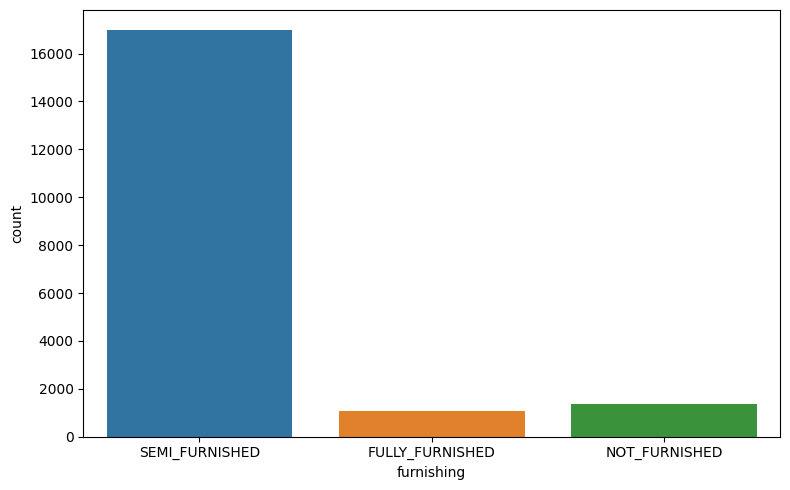

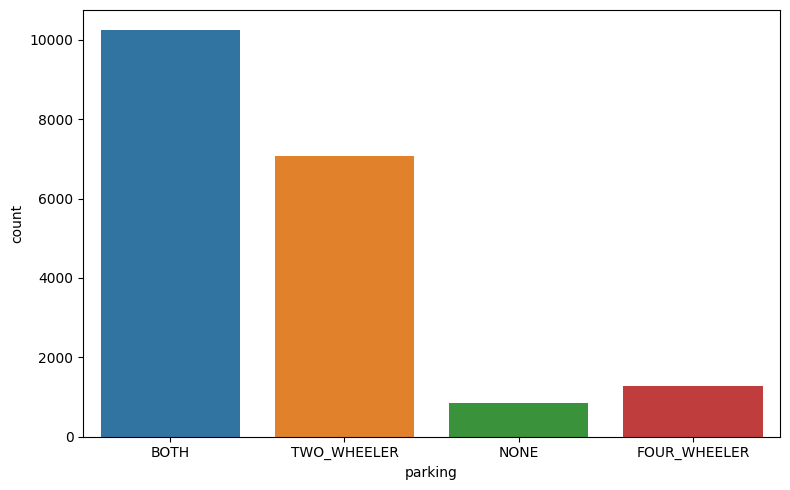

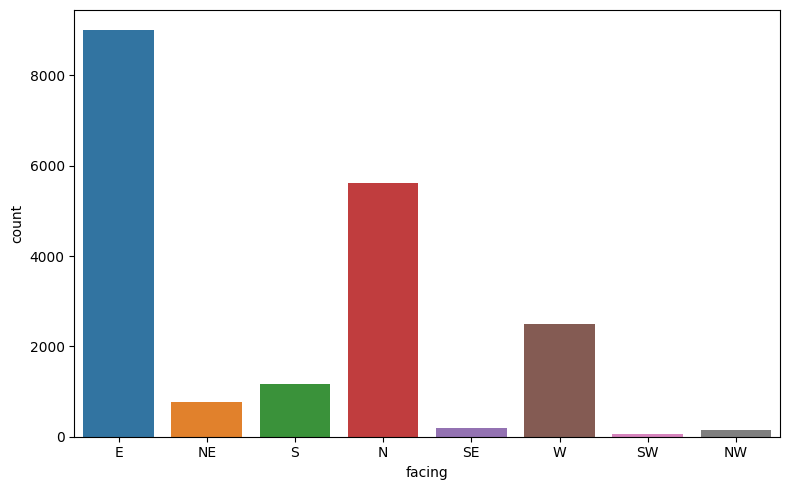

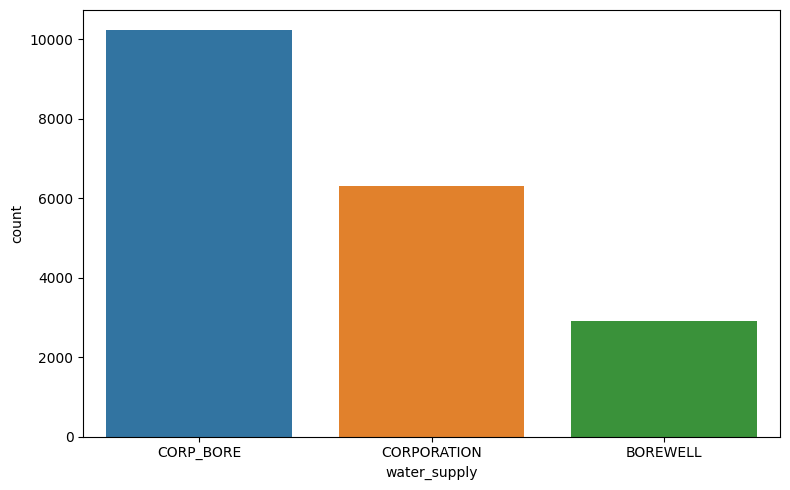

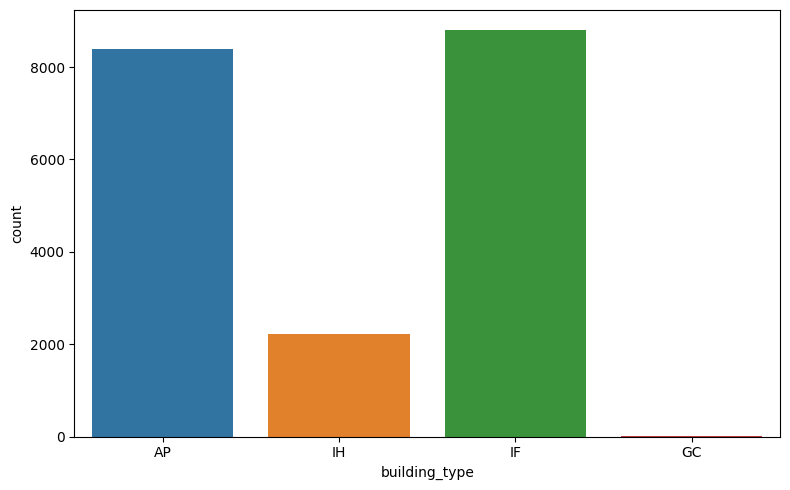

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(df,x='lease_type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
plt.figure(figsize=(8,5))
sns.countplot(df,x='furnishing')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
plt.figure(figsize=(8,5))
sns.countplot(df,x='parking')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
plt.figure(figsize=(8,5))
sns.countplot(df,x='facing')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
plt.figure(figsize=(8,5))
sns.countplot(df,x='water_supply')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
plt.figure(figsize=(8,5))
sns.countplot(df,x='building_type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [23]:
df['type'].replace('1BHK1','BHK1',inplace=True)
df['type'].replace('bhk2','BHK2',inplace=True)
df['type'].replace('bhk3','BHK3',inplace=True)

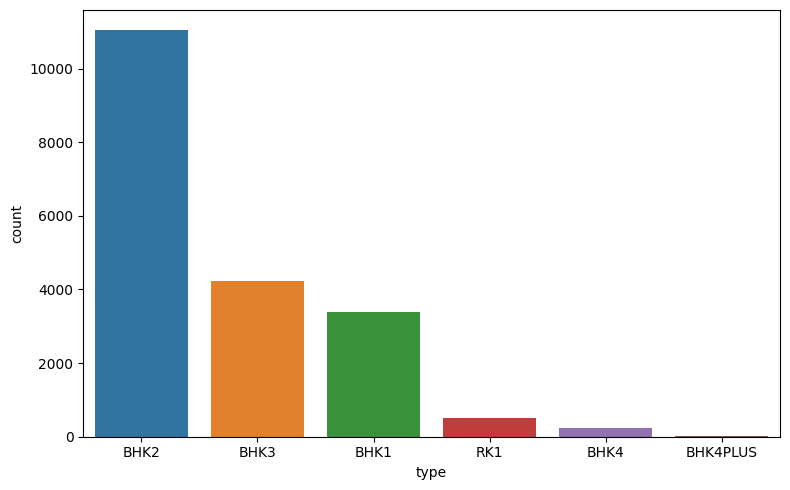

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(df,x='type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Axes: xlabel='rent', ylabel='cup_board'>

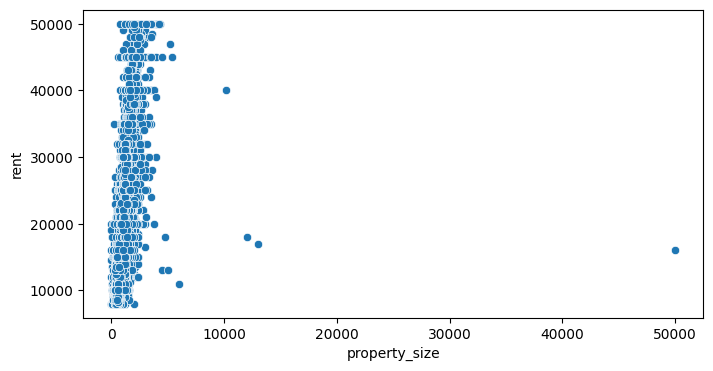

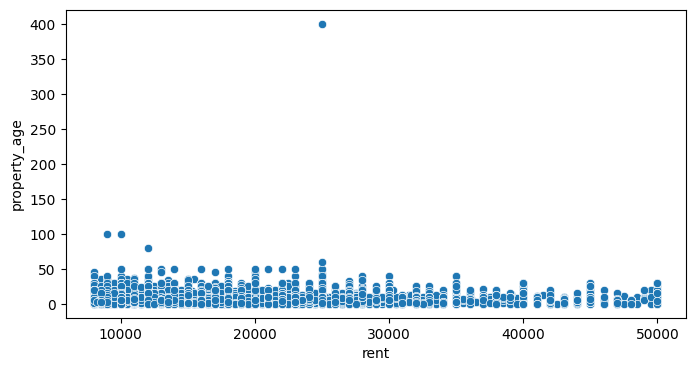

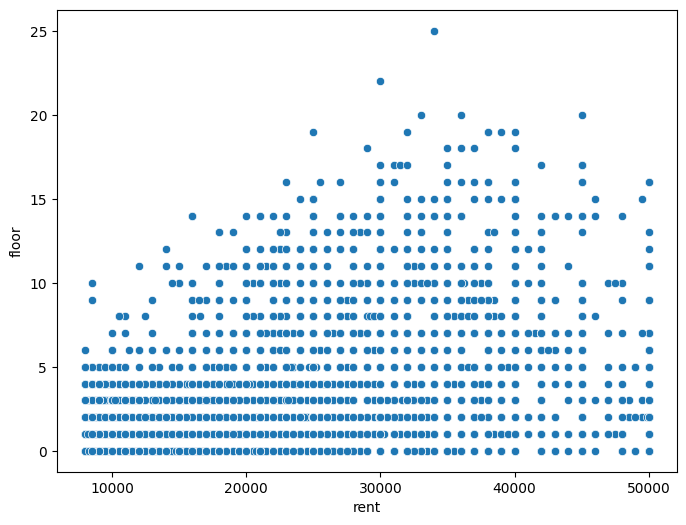

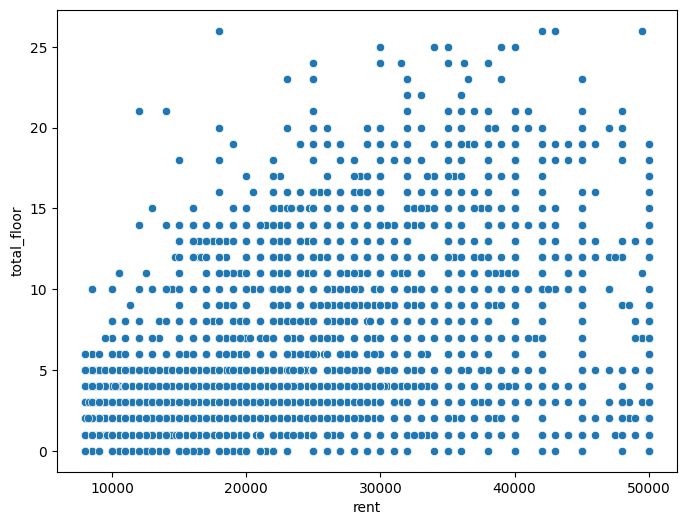

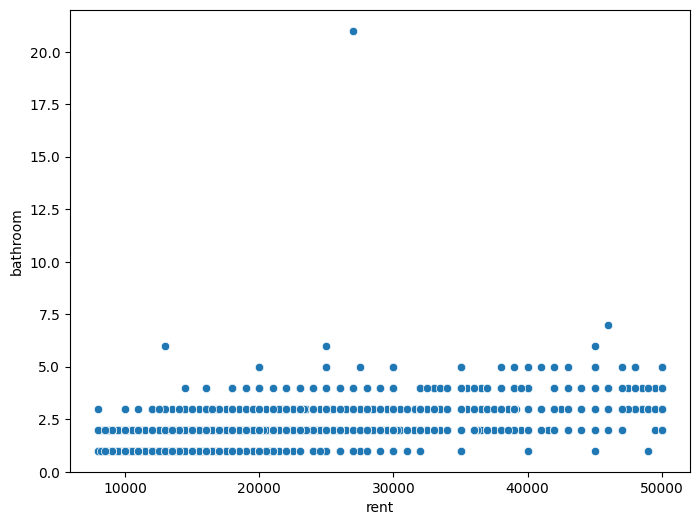

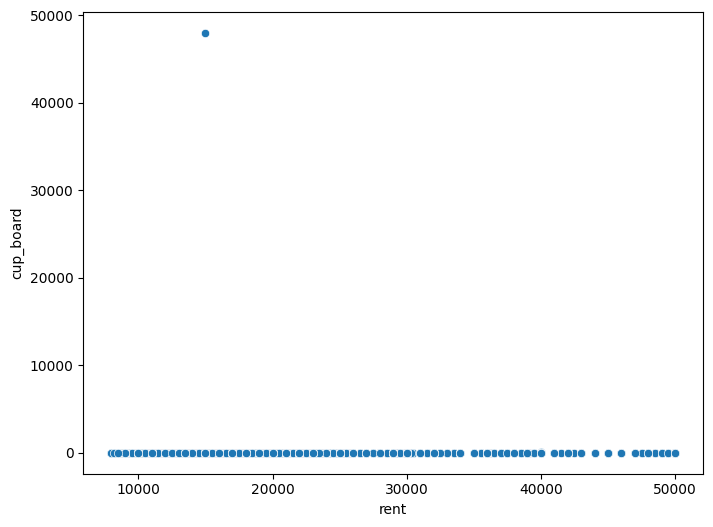

In [25]:
# bivariant
# num vs num
# scatter
plt.figure(figsize=(8, 4))
sns.scatterplot(y='rent', x='property_size', data=df)
plt.figure(figsize=(8, 4))
sns.scatterplot(x='rent', y='property_age', data=df)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rent', y='floor', data=df)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rent', y='total_floor', data=df)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rent', y='bathroom', data=df)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rent', y='cup_board', data=df)

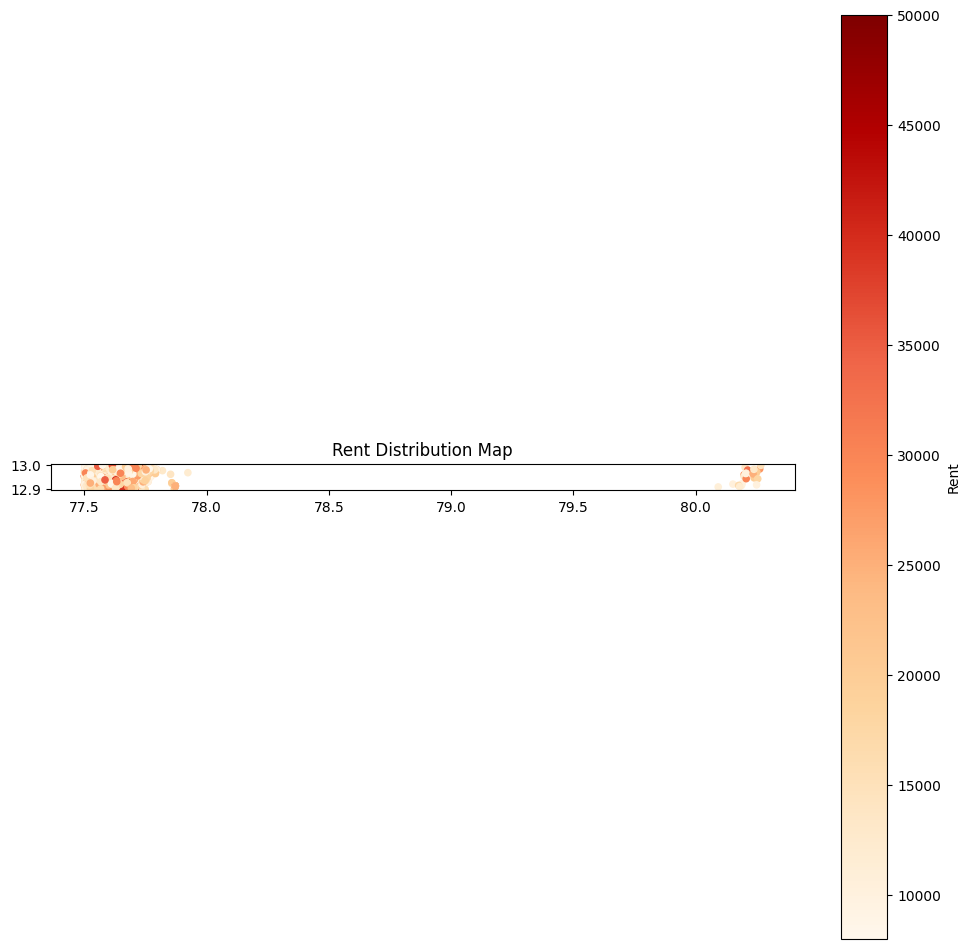

In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a GeoDataFrame from the dataframe
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Plot the GeoDataFrame with rent as the color
fig, ax = plt.subplots(figsize=(12, 12))
gdf.plot(ax=ax, column='rent', legend=True, legend_kwds={'label': 'Rent'}, cmap='OrRd', markersize=20)
plt.title('Rent Distribution Map')
plt.show()

In [27]:
pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 45.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/contextily/tile.py:620: UserWarning: The inferred zoom level of 25 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


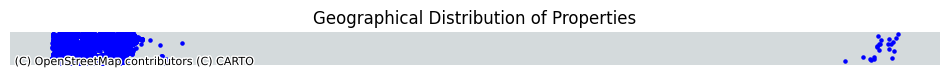

In [28]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx  # Import the contextily library


# Using a different basemap provider
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, color='blue', markersize=5)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.title('Geographical Distribution of Properties')
plt.show()

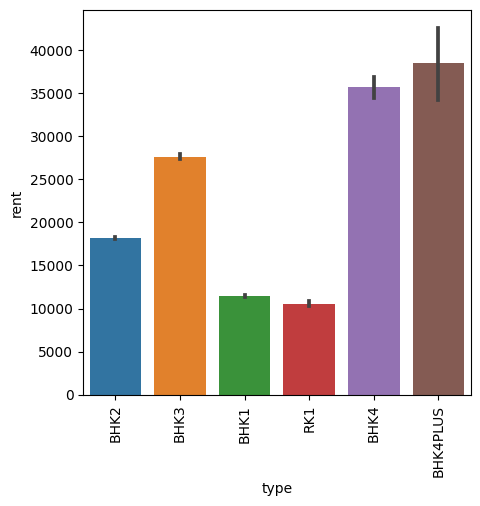

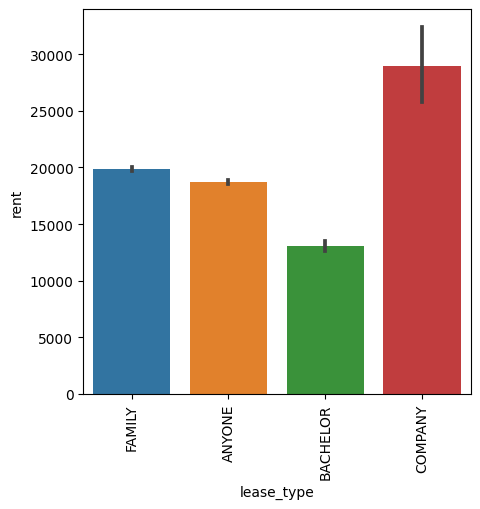

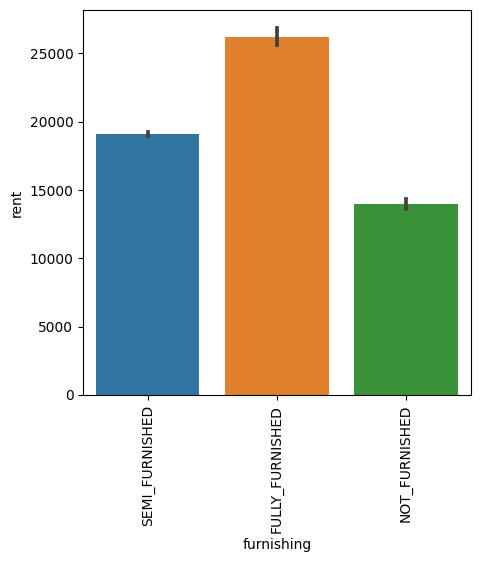

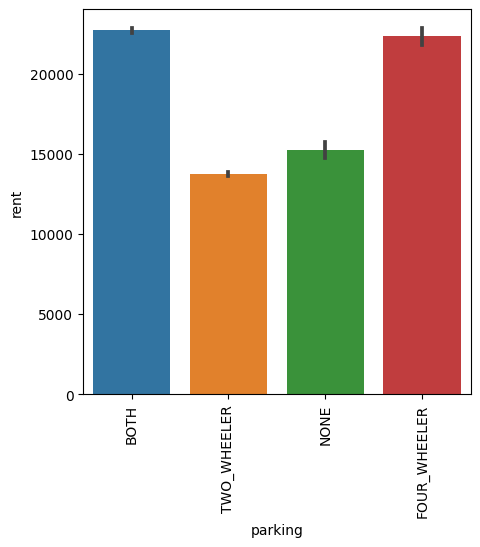

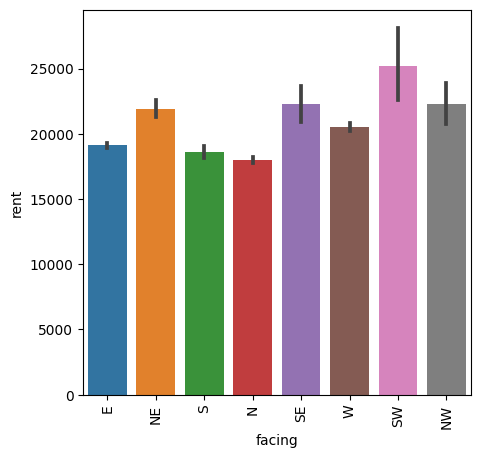

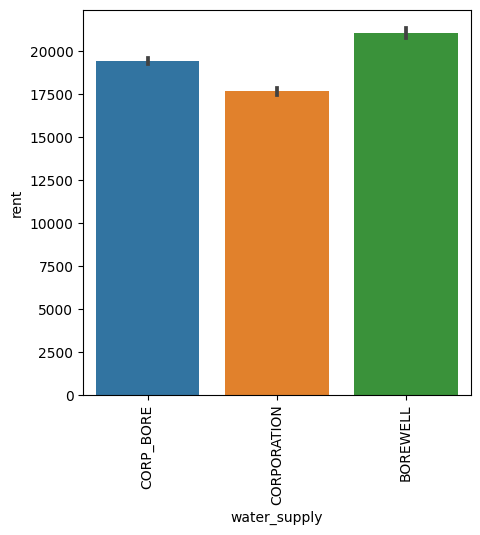

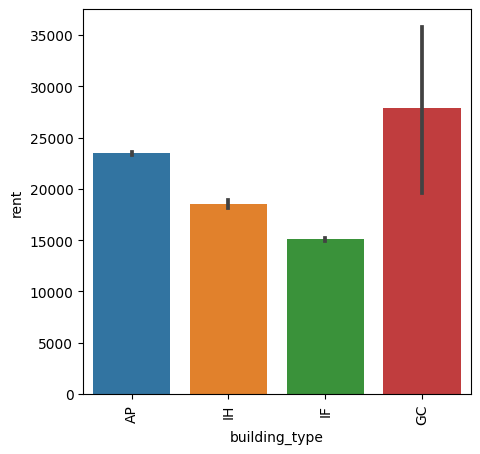

In [29]:
plt.figure(figsize=(5,5))
sns.barplot(data=df,x='type',y='rent')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(5,5))
sns.barplot(data=df,x='lease_type',y='rent')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(5,5))
sns.barplot(data=df,x='furnishing',y='rent')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(5,5))
sns.barplot(data=df,x='parking',y='rent')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(5,5))
sns.barplot(data=df,x='facing',y='rent')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(5,5))
sns.barplot(data=df,x='water_supply',y='rent')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(5,5))
sns.barplot(data=df,x='building_type',y='rent')
plt.xticks(rotation=90)
plt.show()

<ipython-input-30-c12075687efd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


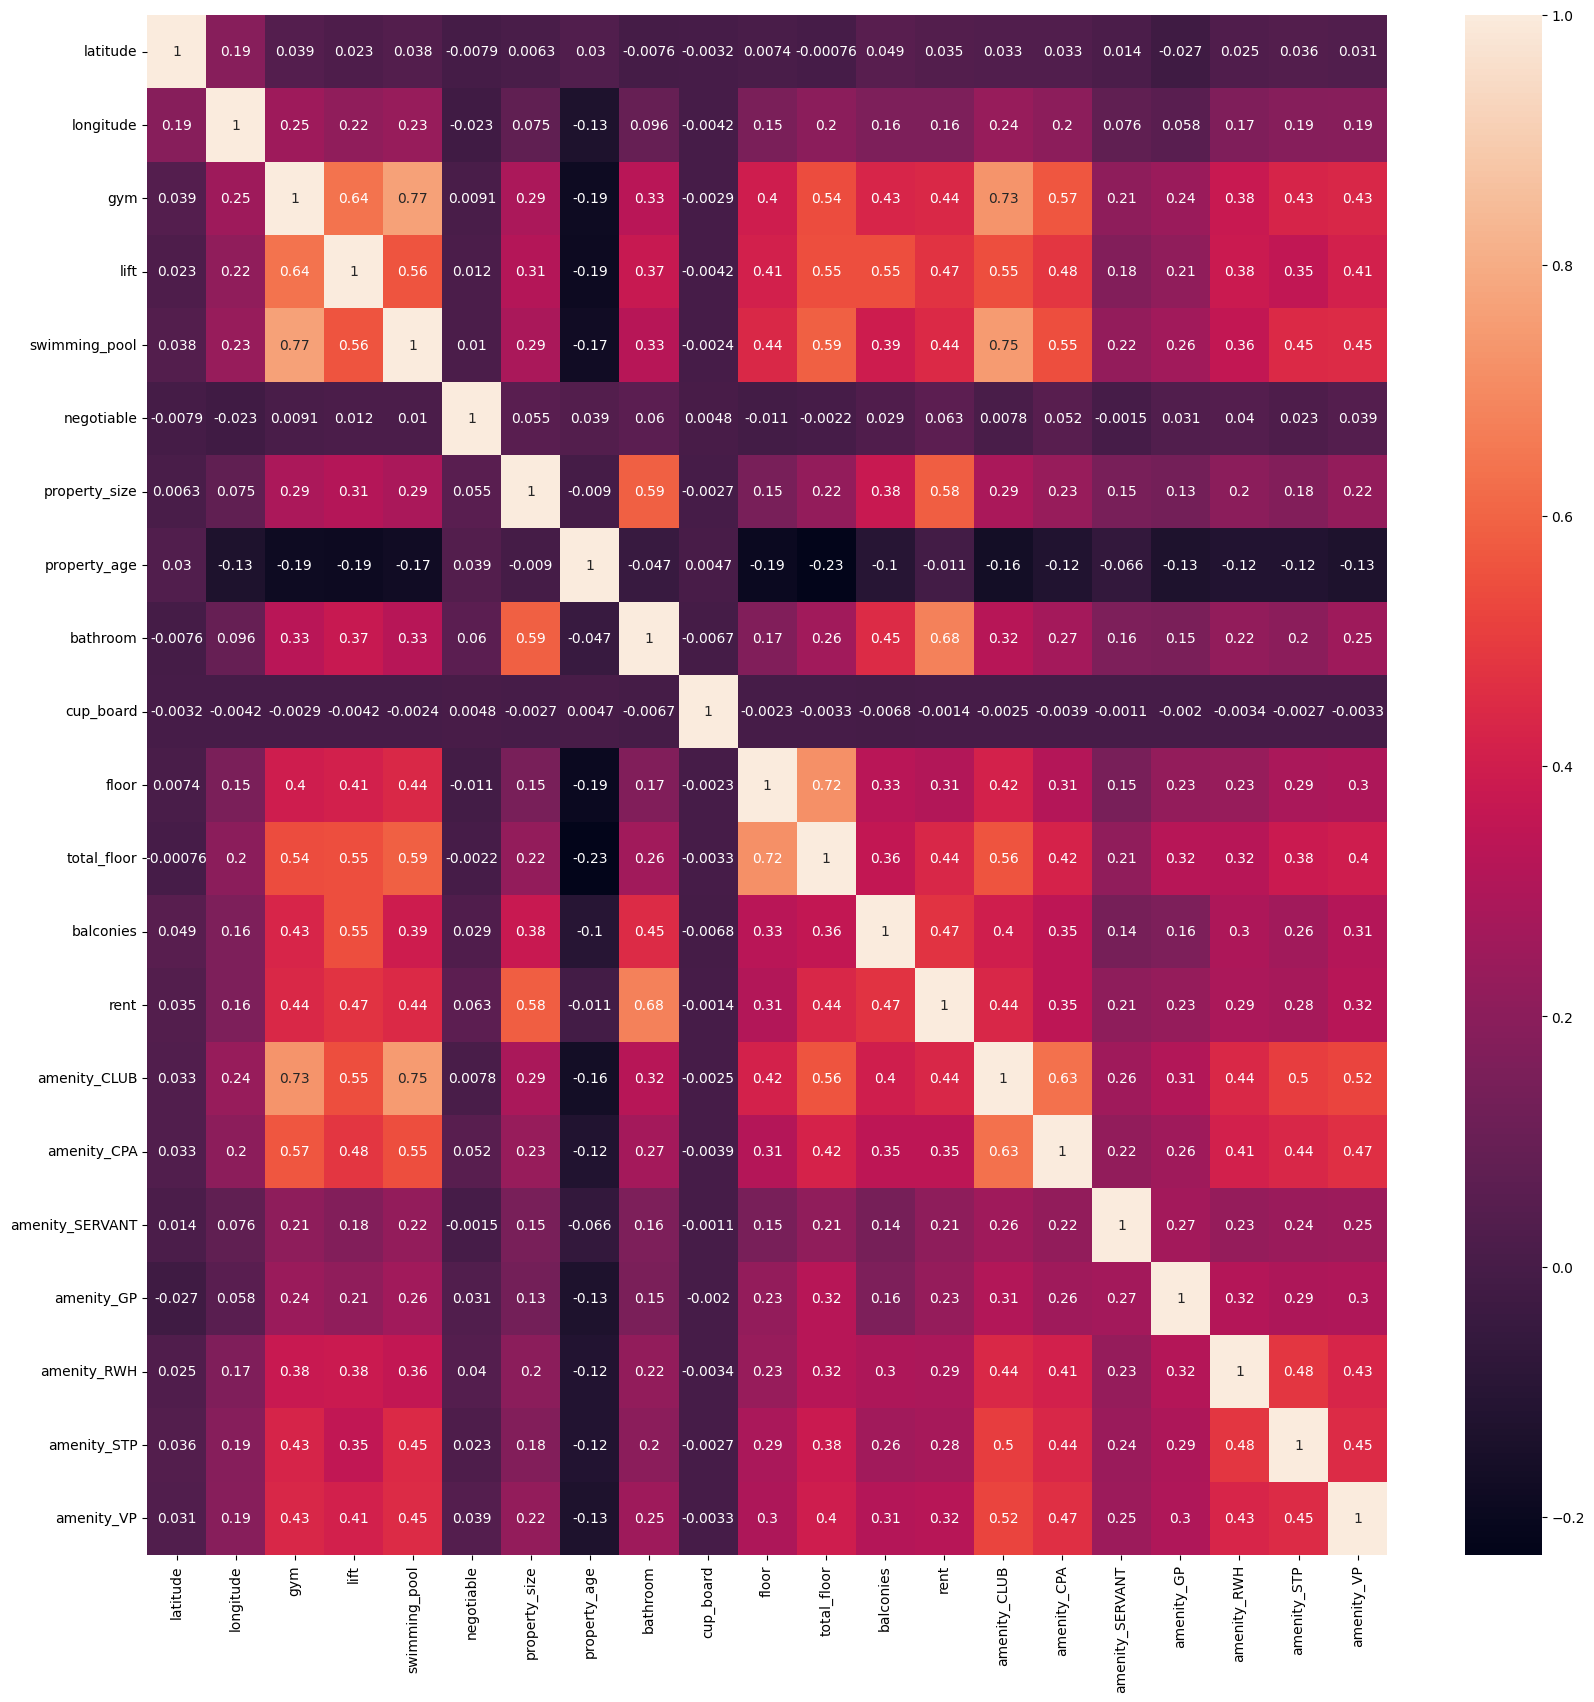

In [30]:
# multivariant
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [31]:
# Checking for outliers in numerical columns using IQR method

# Define a function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers
# Apply the function to the 'property_size', 'rent', 'property_age', and 'bathroom' columns
outliers_property_size = detect_outliers(df, 'property_size')
outliers_rent = detect_outliers(df, 'rent')
outliers_property_age = detect_outliers(df, 'property_age')
outliers_bathroom = detect_outliers(df, 'bathroom')

# Print the number of outliers detected in each column
print('Number of outliers in property_size:', len(outliers_property_size))
print('Number of outliers in rent:', len(outliers_rent))
print('Number of outliers in property_age:', len(outliers_property_age))
print('Number of outliers in bathroom:', len(outliers_bathroom))

Number of outliers in property_size: 454
Number of outliers in rent: 402
Number of outliers in property_age: 283
Number of outliers in bathroom: 319


In [32]:
df.drop(df[df['property_size'] >= 40000].index, inplace=True)
df.drop(df[df['property_age']>= 300].index, inplace=True)
df.drop(df[df['bathroom']>= 20].index, inplace=True)
df.drop(df[df['cup_board']>= 40000].index, inplace=True)

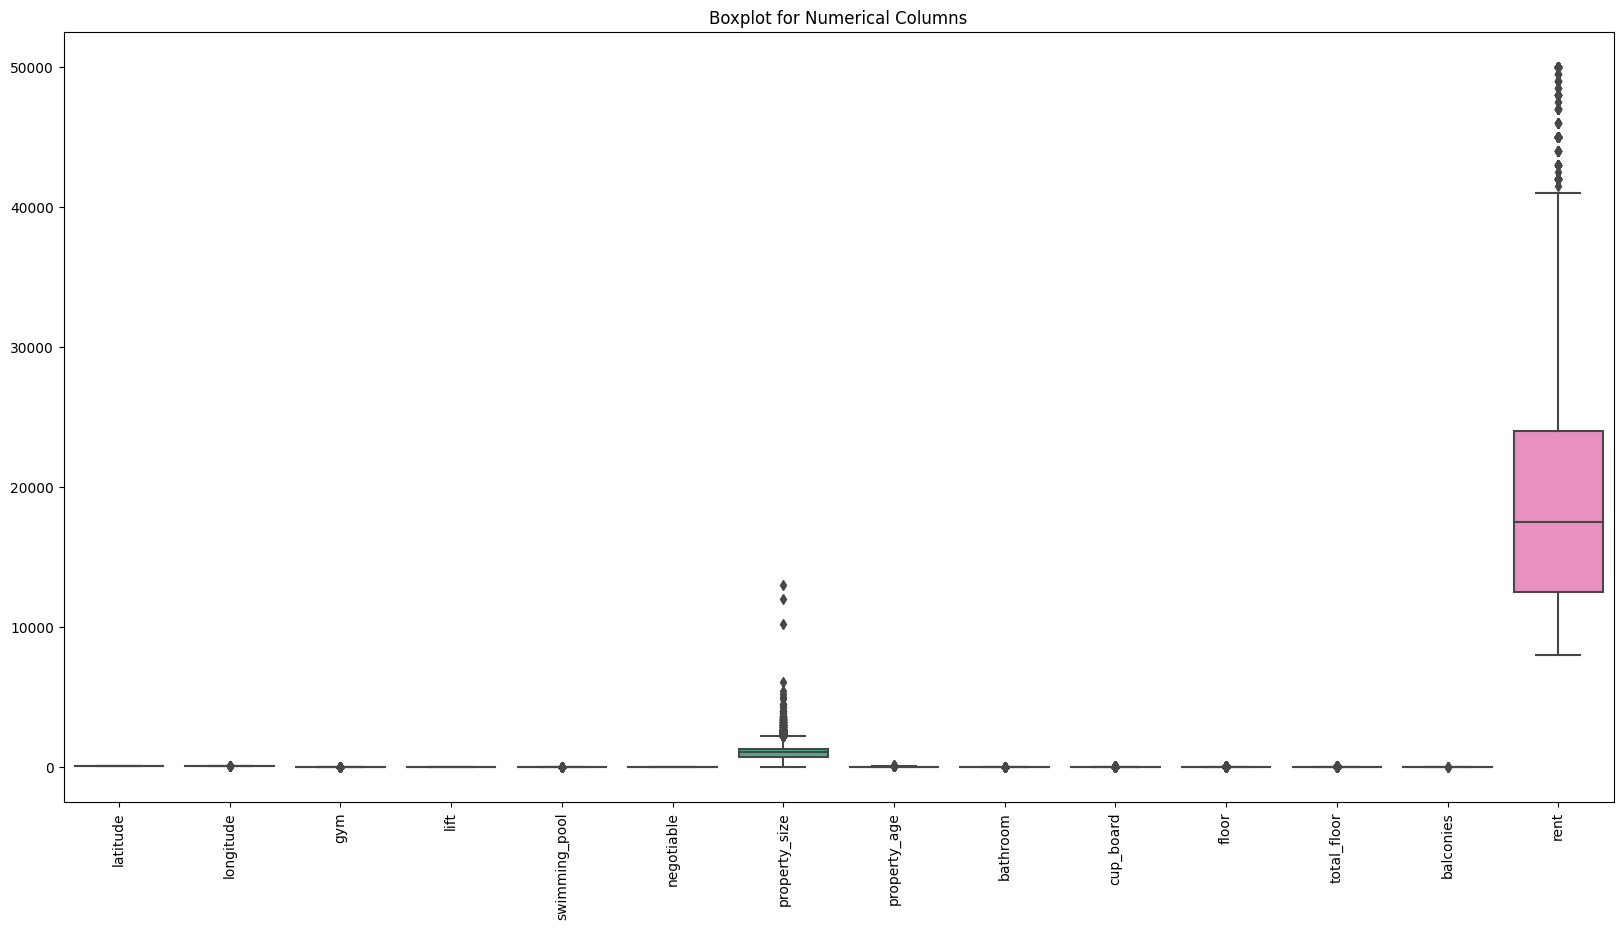

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical columns for the boxplot
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Plotting boxplots for all numerical columns
df_numerical = df[numerical_columns]

plt.figure(figsize=(20,10))
sns.boxplot(data=df_numerical)
plt.xticks(rotation=90)
plt.title('Boxplot for Numerical Columns')
plt.show()

In [34]:
df[['latitude','longitude','rent']]

,latitude,longitude,rent
0,12.934471,77.634471,40000.0
1,12.929557,77.672280,22000.0
2,12.982870,80.262012,28000.0
3,12.955991,77.531634,8000.0
4,12.963903,77.649446,45000.0
...,...,...,...
20495,12.925380,77.524397,25000.0
20496,12.931072,77.632361,30000.0
20497,12.901800,77.566597,16000.0
20498,12.965502,77.647694,30000.0


# **ENCODING**

In [35]:
categorical_cols= df.select_dtypes(include= 'object')
categorical_cols

,type,locality,lease_type,furnishing,parking,facing,water_supply,building_type,amenity_INTERNET,amenity_AC,amenity_INTERCOM,amenity_FS,amenity_SECURITY,amenity_SC,amenity_PARK,amenity_HK,amenity_PB
0,BHK2,Whitefield,FAMILY,SEMI_FURNISHED,BOTH,E,CORP_BORE,AP,True,False,True,True,True,True,False,False,True
1,BHK2,Bellandur,ANYONE,SEMI_FURNISHED,BOTH,NE,CORPORATION,AP,False,False,False,False,True,True,True,False,True
2,BHK3,Thiruvanmiyur,FAMILY,SEMI_FURNISHED,BOTH,E,CORP_BORE,AP,False,False,False,False,False,True,True,False,True
3,BHK1,Attiguppe,FAMILY,SEMI_FURNISHED,TWO_WHEELER,E,CORPORATION,IH,False,False,False,False,False,False,False,False,False
4,BHK3,Kodihalli,FAMILY,SEMI_FURNISHED,BOTH,E,CORPORATION,IH,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20495,BHK2,"Gattigere,RR Nagar",ANYONE,SEMI_FURNISHED,BOTH,E,BOREWELL,AP,True,False,True,False,True,True,False,False,True
20496,BHK2,Koramangala 4th Block,ANYONE,SEMI_FURNISHED,BOTH,N,CORPORATION,IH,True,False,False,False,False,True,True,False,False
20497,BHK2,Kumaraswamy Layout,FAMILY,SEMI_FURNISHED,BOTH,W,BOREWELL,AP,True,False,False,False,True,False,True,False,True
20498,BHK2,Indiranagar,FAMILY,SEMI_FURNISHED,BOTH,E,CORP_BORE,AP,True,False,False,True,True,True,True,True,True


In [36]:
category_unique_values = []

for col in categorical_cols:
    unique_values = {'column': col, 'values': df[col].unique().tolist()}
    category_unique_values.append(unique_values)

# Now, category_unique_values is a list of dictionaries, each containing 'column' and 'values' keys

In [37]:
category_unique_values

[{'column': 'type',
  'values': ['BHK2', 'BHK3', 'BHK1', 'RK1', 'BHK4', 'BHK4PLUS']},
 {'column': 'locality',
  'values': ['Whitefield',
   'Bellandur',
   'Thiruvanmiyur',
   'Attiguppe',
   'Kodihalli',
   'Seetharampalya,Hoodi',
   'Narayanappa Garden,Whitefield',
   'HSR Layout 5th Sector',
   'Banashankari',
   'RR Nagar',
   'ITPL Residential Flats',
   'Raja Rajeshwari Nagar',
   'Prestige Shanthinikethan, Bengaluru, Karnataka, India',
   'Murugeshpalya',
   'Sheshadripuram',
   'Cox Town',
   'BTM 2nd Stage',
   'Chikkakannalli',
   'agara',
   'Doddanekkundi',
   'Munnekollal',
   'Garudachar Palya,Mahadevapura',
   'Bommanahalli',
   'Hoodi',
   'Mahadevapura',
   'Viveka Nagar',
   'Kadubeesanahalli,',
   'Sanjeevini Nagar',
   'Doddanekundi',
   'Indiranagar',
   'Brookefield',
   'New Tippasandra',
   'JP Nagar 1st Phase',
   'Vimanapura',
   'Jayanagar',
   'Uttarahalli Hobli',
   'Kaikondrahalli',
   'Kaggadasapura',
   'Adugodi',
   'Jayanagar 5th Block',
   'Hanumantha

In [44]:
df['lease_type'] = df['lease_type'].map({'FAMILY':0, 'ANYONE':1, 'BACHELOR':2, 'COMPANY':3})
df['type'] = df['type'].map({'BHK2':0, 'BHK3':1, 'BHK1':2, 'RK1':3, 'BHK4':4, 'BHK4PLUS':5})
df['furnishing'] = df['furnishing'].map({'SEMI_FURNISHED':0, 'FULLY_FURNISHED':1, 'NOT_FURNISHED':2})
df['parking'] = df['parking'].map({'BOTH':0, 'TWO_WHEELER':1, 'NONE':2, 'FOUR_WHEELER':3})
df['facing'] = df['facing'].map({'E':0, 'NE':1, 'S':2, 'N':3, 'SE':4, 'W':5, 'SW':6, 'NW':7 })
df['water_supply'] = df['water_supply'].map({'CORP_BORE':0, 'CORPORATION':1, 'BOREWELL':2})
df['building_type'] = df['building_type'].map({'AP':0, 'IH':1, 'IF':2, 'GC': 3})
df['amenity_INTERNET'] = df['amenity_INTERNET'].map({True:1, False:0})
df['amenity_AC'] = df['amenity_AC'].map({False:0, True:1})
df['amenity_INTERCOM'] = df['amenity_INTERCOM'].map({True:1, False:0})
df['amenity_FS'] = df['amenity_FS'].map({True:1, False:0})
df['amenity_SECURITY'] = df['amenity_SECURITY'].map({True:1, False:0})
df['amenity_SC'] = df['amenity_SC'].map({True:1, False:0})
df['amenity_PARK'] = df['amenity_PARK'].map({False:0, True:1})
df['amenity_HK'] = df['amenity_HK'].map({False:0, True:1})
df['amenity_PB'] = df['amenity_PB'].map({True:1, False:0})
df['amenity_STP'] = df['amenity_STP'].map({True:1, False:0})
df['amenity_CLUB'] = df['amenity_CLUB'].map({True:1, False:0})
df['amenity_CPA'] = df['amenity_CPA'].map({True:1, False:0})
df['amenity_SERVANT'] = df['amenity_SERVANT'].map({True:1, False:0})
df['amenity_GP'] = df['amenity_GP'].map({True:1, False:0})
df['amenity_RWH'] = df['amenity_RWH'].map({True:1, False:0})
df['amenity_VP'] = df['amenity_VP'].map({True:1, False:0})

In [45]:
df['locality'] = df['locality'].map(df['locality'].value_counts(normalize=True))

In [46]:
df

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,amenity_SERVANT,amenity_SECURITY,amenity_SC,amenity_GP,amenity_PARK,amenity_RWH,amenity_STP,amenity_HK,amenity_PB,amenity_VP
0,0,0.050852,12.934471,77.634471,0,1,1,1,0,0,...,0,1,1,1,0,1,1,0,1,1
1,0,0.021669,12.929557,77.672280,1,0,1,0,1,0,...,0,1,1,0,1,1,1,0,1,1
2,1,0.046220,12.982870,80.262012,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,1
3,2,0.007566,12.955991,77.531634,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.013897,12.963903,77.649446,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20495,0,0.009728,12.925380,77.524397,1,1,1,1,1,0,...,0,1,1,0,0,0,0,0,1,1
20496,0,0.011889,12.931072,77.632361,1,0,0,0,1,0,...,0,0,1,0,1,1,0,0,0,0
20497,0,0.010500,12.901800,77.566597,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
20498,0,0.011426,12.965502,77.647694,0,0,1,0,0,0,...,0,1,1,0,1,0,0,1,1,1


In [47]:
null_values = df.isnull().sum()
print(null_values)

type                0
locality            0
latitude            0
longitude           0
lease_type          0
gym                 0
lift                0
swimming_pool       0
negotiable          0
furnishing          0
parking             0
property_size       0
property_age        0
bathroom            0
facing              0
cup_board           0
floor               0
total_floor         0
water_supply        0
building_type       0
balconies           0
rent                0
amenity_INTERNET    0
amenity_AC          0
amenity_CLUB        0
amenity_INTERCOM    0
amenity_CPA         0
amenity_FS          0
amenity_SERVANT     0
amenity_SECURITY    0
amenity_SC          0
amenity_GP          0
amenity_PARK        0
amenity_RWH         0
amenity_STP         0
amenity_HK          0
amenity_PB          0
amenity_VP          0
dtype: int64


# **TRAIN TEST SPLIT**

In [48]:
from sklearn.model_selection import train_test_split

X= df.drop("rent",axis=1)
y=df["rent"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

# **LINEAR REGRESSION MODEL**

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 23650354.32


In [50]:
import numpy as np

rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")

RMSE: 4863.162995718686


In [51]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print(f"R-squared score: {r2}")

R-squared score: 0.6639989380730495


# **OLS**

In [52]:
import statsmodels.api as sm

Xc = sm.add_constant(X)

Xc_train, Xc_test, y_train, y_test = train_test_split(Xc, y, test_size=0.3, random_state=123)

ols_model = sm.OLS(y_train, Xc_train)
result = ols_model.fit()

# Display the summary of the OLS regression
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     703.5
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        06:56:49   Log-Likelihood:            -1.3510e+05
No. Observations:               13600   AIC:                         2.703e+05
Df Residuals:                   13562   BIC:                         2.706e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.629e+05   3.42e+04  

# **LAZY PREDICT**

In [53]:
pip install lazypredict

In [54]:
import lazypredict

In [55]:
from lazypredict.Supervised import LazyRegressor

regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = regressor.fit(X_train, X_test, y_train, y_test)

# Print the performance of each model
print(models)

 98%|█████████▊| 41/42 [04:19<00:03,  3.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 13600, number of used features: 37
[LightGBM] [Info] Start training from score 19143.431029


100%|██████████| 42/42 [04:20<00:00,  6.20s/it]

                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
LGBMRegressor                                0.82       0.83  3502.40   
HistGradientBoostingRegressor                0.82       0.82  3512.51   
XGBRegressor                                 0.82       0.82  3543.90   
RandomForestRegressor                        0.81       0.81  3672.27   
GradientBoostingRegressor                    0.79       0.79  3843.26   
BaggingRegressor                             0.79       0.79  3860.73   
ExtraTreesRegressor                          0.78       0.78  3895.64   
LassoLarsCV                                  0.66       0.66  4861.58   
LassoCV                                      0.66       0.66  4861.64   
LassoLarsIC                                  0.66       0.66  4861.97   
LassoLars                                    0.66       0.66  4862.93   
Lasso                                        0.66  

# **VIF**

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

            Variable       VIF
0               type      1.71
1           locality      2.86
2           latitude 174271.64
3          longitude 174518.07
4         lease_type      2.07
5                gym      4.42
6               lift      6.47
7      swimming_pool      4.01
8         negotiable      3.54
9         furnishing      1.27
10           parking      1.80
11     property_size     14.71
12      property_age      2.28
13          bathroom     19.46
14            facing      1.90
15         cup_board      4.56
16             floor      3.68
17       total_floor      7.11
18      water_supply      1.80
19     building_type      6.89
20         balconies      4.09
21  amenity_INTERNET      3.33
22        amenity_AC      1.16
23      amenity_CLUB      4.05
24  amenity_INTERCOM      2.47
25       amenity_CPA      2.88
26        amenity_FS      2.96
27   amenity_SERVANT      1.23
28  amenity_SECURITY      4.81
29        amenity_SC      3.06
30        amenity_GP      1.42
31      

# **FEATURE SELECTION(RFE)**

In [57]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the model
model = LinearRegression()

# Initialize RFE with the model and the desired number of features
num_features_to_select = 15  # Adjust as needed
rfe = RFE(model, n_features_to_select=num_features_to_select)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Train a model using the selected features
model.fit(X_train[selected_features], y_train)

# Make predictions on the test set
y_pred = model.predict(X_test[selected_features])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 28262540.95


In [58]:
selected_features

Index(['locality', 'latitude', 'longitude', 'swimming_pool', 'negotiable',
       'furnishing', 'bathroom', 'cup_board', 'total_floor', 'balconies',
       'amenity_AC', 'amenity_CLUB', 'amenity_SERVANT', 'amenity_GP',
       'amenity_PB'],
      dtype='object')

In [59]:
# Check if the number of features to select is correct
print('Number of features to select:', num_features_to_select)
print('Number of features available:', X_train.shape[1])

# If the number of features to select is not equal to the number of features available,
# adjust the number of features to select
if num_features_to_select != X_train.shape[1]:
    num_features_to_select = X_train.shape[1]
    rfe = RFE(model, n_features_to_select=num_features_to_select)
    rfe.fit(X_train, y_train)
    selected_features = X.columns[rfe.support_]
    print('Adjusted number of features to select:', num_features_to_select)
    print('Selected features:', selected_features)

Number of features to select: 15
Number of features available: 37
Adjusted number of features to select: 37
Selected features: Index(['type', 'locality', 'latitude', 'longitude', 'lease_type', 'gym',
       'lift', 'swimming_pool', 'negotiable', 'furnishing', 'parking',
       'property_size', 'property_age', 'bathroom', 'facing', 'cup_board',
       'floor', 'total_floor', 'water_supply', 'building_type', 'balconies',
       'amenity_INTERNET', 'amenity_AC', 'amenity_CLUB', 'amenity_INTERCOM',
       'amenity_CPA', 'amenity_FS', 'amenity_SERVANT', 'amenity_SECURITY',
       'amenity_SC', 'amenity_GP', 'amenity_PARK', 'amenity_RWH',
       'amenity_STP', 'amenity_HK', 'amenity_PB', 'amenity_VP'],
      dtype='object')


# **LGBM**

In [60]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from math import sqrt


from sklearn.model_selection import cross_val_score

# Using the best parameters from the previous LGBM model
best_lgbm_params = {
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'n_estimators': 300,
    'num_leaves': 31
}

# Initialize LGBM with the best parameters and regularization
lgbm_reg = lgb.LGBMRegressor(**best_lgbm_params, random_state=123, reg_alpha=0.1, reg_lambda=0.1)

# Perform cross-validation to get the RMSE
scores = cross_val_score(lgbm_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

# Calculate the average RMSE across all folds
rmse_reg = sqrt(-scores.mean())

# Fit the model
lgbm_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_reg = lgbm_reg.predict(X_test)

# Calculate the RMSE on the test set
rmse_test_reg = sqrt(mean_squared_error(y_test, y_pred_reg))

# Output the RMSE from cross-validation and the test set
print('Cross-validated RMSE with regularization:', rmse_reg)
print('Test set RMSE with regularization:', rmse_test_reg)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1032
[LightGBM] [Info] Number of data points in the train set: 10880, number of used features: 37
[LightGBM] [Info] Start training from score 19124.431342
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1033
[LightGBM] [Info] Number of data points in the train set: 10880, number of used features: 37
[LightGBM] [Info] Start training from score 19182.322610
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is n

In [61]:
# Re-run the feature selection process with the correct extraction of feature importances
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

# Assuming X_train, y_train, X_test, y_test are already defined and best_lgbm_params is available from previous context

# Initialize the LGBMRegressor with the best parameters
lgbm_for_selection = lgb.LGBMRegressor(**best_lgbm_params, random_state=123)

# Fit the model to get feature importances
lgbm_for_selection.fit(X_train, y_train)

# Use SelectFromModel to select features based on importance weights
selector = SelectFromModel(lgbm_for_selection, threshold='mean')
selector.fit(X_train, y_train)

# Get the boolean mask for the selected features
support = selector.get_support()

# Get the feature importances
feature_importances = lgbm_for_selection.feature_importances_

# Select the feature importances for the features deemed important
important_feature_importances = feature_importances[support]

# Get the feature names for the important features
important_feature_names = X_train.columns[support]

# Create a list of tuples with feature names and their importance
important_features = list(zip(important_feature_names, important_feature_importances))

# Transform the training and test sets
X_important_train = selector.transform(X_train)


X_important_test = selector.transform(X_test)

# Fit the model using only the selected features
lgbm_for_selection.fit(X_important_train, y_train)

# Predict on the test set using only the selected features
y_pred_important = lgbm_for_selection.predict(X_important_test)

# Calculate the RMSE for the model using only the selected features
rmse_important = sqrt(mean_squared_error(y_test, y_pred_important))

# Output the selected feature names and their importances
print('Selected features and their importances:', important_features)
print('RMSE using selected features:', rmse_important)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1039
[LightGBM] [Info] Number of data points in the train set: 13600, number of used features: 37
[LightGBM] [Info] Start training from score 19143.431029
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1039
[LightGBM] [Info] Number of data points in the train set: 13600, number of used features: 37
[LightGBM] [Info] Start training from score 19143.431029
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] 

In [62]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print(f"R-squared score: {r2}")

R-squared score: 0.5984735093892537


# **New data frame with only selected columns**

In [63]:
dfs=df[['type', 'latitude', 'longitude', 'lease_type', 'property_size', 'property_age', 'furnishing', 'balconies', 'bathroom', 'facing', 'cup_board', 'floor', 'total_floor', 'amenity_AC', 'amenity_CLUB', 'amenity_SERVANT', 'amenity_GP',
       'amenity_PB', 'rent']]

In [64]:
dfs

,type,latitude,longitude,lease_type,property_size,property_age,furnishing,balconies,bathroom,facing,cup_board,floor,total_floor,amenity_AC,amenity_CLUB,amenity_SERVANT,amenity_GP,amenity_PB,rent
0,0,12.93,77.63,0,1250,25.00,0,2.00,2.00,0,2.00,6.00,12.00,0,1,0,1,1,40000.00
1,0,12.93,77.67,1,1400,4.00,0,2.00,2.00,1,2.00,3.00,4.00,0,0,0,0,1,22000.00
2,1,12.98,80.26,0,1350,6.00,0,3.00,3.00,0,3.00,1.00,5.00,0,0,0,0,1,28000.00
3,2,12.96,77.53,0,600,3.00,0,0.00,1.00,0,1.00,1.00,2.00,0,0,0,0,0,8000.00
4,1,12.96,77.65,0,1500,15.00,0,1.00,3.00,0,4.00,0.00,0.00,0,0,0,0,0,45000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20495,0,12.93,77.52,1,1650,1.00,0,2.00,3.00,0,3.00,4.00,4.00,0,0,0,0,1,25000.00
20496,0,12.93,77.63,1,1000,10.00,0,2.00,2.00,3,2.00,1.00,2.00,0,0,0,0,0,30000.00
20497,0,12.90,77.57,0,1000,0.00,0,2.00,2.00,5,2.00,5.00,5.00,0,1,0,0,1,16000.00
20498,0,12.97,77.65,0,1000,5.00,0,3.00,2.00,0,2.00,2.00,4.00,0,0,0,0,1,30000.00


In [65]:
dfs.to_csv('dfs.csv', index=False)